# HOMELESSNESS IN AUSTIN
![jwj-Homeless-1417.jpg](jwj-Homeless-1417.jpg)

In 2019, Austin, TX city council made a bold move to "decriminalize homelessness" by lifting the camping ban inside city limits and getting rid of citations for panhandling and sitting or standing on sidewalks. This measure drew plenty of national attention with both praise and criticism but was ultimately recended in a recent vote in April and Austin begin enforcing the camping ban once again in July. There is no shortage of opinions on what the "problem" is and what the city "should" be doing, but I began to wonder instead, what COULD the city do. The focus of this report is on summarizing the homelessness situation in Austin in the context of the state and national homeless situation, analyzing the city's goals, metrics and budget, and trying to identify oppotunities for the city to have a bigger impact on its effort to reduce homelessness. 

The datasets that I used for this analysis are 
- [CoC System Performance Measures Data](https://www.hudexchange.info/resource/5691/system-performance-measures-data-since-fy-2015/)
- [Austin CoC Dashboard](https://files.hudexchange.info/reports/published/CoC_Dash_CoC_TX-503-2019_TX_2019.pdf)
- [City Manager report for recommendations on addressing homelessness](http://www.austintexas.gov/edims/pio/document.cfm?id=344008)
- [2007 - 2020 Point-in-Time Estimates by State](https://www.huduser.gov/portal/sites/default/files/xls/2007-2020-PIT-Estimates-by-state.xlsx)
- [2007 - 2020 Point-in-Time Estimates by CoC ](https://www.huduser.gov/portal/sites/default/files/xls/2007-2020-PIT-Estimates-by-CoC.xlsx)
- [Austin population](https://cdn1.austinchamber.com/%20ed/files/GreaterAustinProfileData.xlsx?mtime=20210701135126&_ga=2.131708751.1171804070.1626996919-1803679446.1626996919)

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# setup matplotlib to operate in Jupyter Notebooks
%matplotlib inline

Importing the data and reformatting for clarity

In [2]:
# Pulling the PIT homeless counts for US total and Texas from an excel spreadsheet where each year is on a separate page

years = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

def open_PIT_sheet(years):
    """Open PIT count and concat pages for select columns"""
    
    cols = ['Overall Homeless, ', 'Sheltered Total Homeless, ', 'Unsheltered Homeless, ']
    
    df = pd.DataFrame()
    for i in range(len(years)):
        new_c = ['State'] + [ c + years[i] for c in cols]
        df2 = pd.read_excel('2007-2020-PIT-Estimates-by-state.xlsx', sheet_name= years[i], header=0, usecols=new_c)
        df2['year'] = years[i]
        df2.rename(columns={new_c[1]: cols[0], new_c[2]: cols[1], new_c[3]: cols[2]}, inplace=True)
        df = pd.concat([df, df2], axis=0)
    return df

pit = open_PIT_sheet(years)

# separating the counts for total US count and Texas state count

tx_mask = pit['State'] == 'TX' 
total_mask = pit['State'] == 'Total'
tx_pit = pit[tx_mask].copy()
total_pit = pit[total_mask].copy()


    

In [3]:
# Pulling the PIT homeless counts for Austin from an excel spreadsheet where each year is on a separate page

years = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


def open_coc_sheet(years):
    """Open PIT count and concat pages for select columns"""
    
    cols = ['Overall Homeless, ', 'Sheltered Total Homeless, ', 'Unsheltered Homeless, ']
    
    df = pd.DataFrame()
    for i in range(len(years)):
        # adding year suffix to column names for the column on each page
        new_c = [ c + years[i] for c in cols] + ['CoC Number']
        df2 = pd.read_excel('2007-2020-PIT-Estimates-by-CoC.xlsx', sheet_name= years[i], header=0, usecols=new_c)
        # add column to identify year
        df2['year'] = years[i]
        # selecting only the row for Austin
        austin_mask = df2['CoC Number'] == 'TX-503'
        df2 = df2[austin_mask]
        df2.rename(columns={new_c[0]: cols[0], new_c[1]: cols[1], new_c[2]: cols[2]}, inplace=True)
        df = pd.concat([df, df2], axis=0)
    return df

coc = open_coc_sheet(years)
coc.reset_index(inplace=True, drop=True)

# coc is the dataframe for the Austin CoC PIT statistics

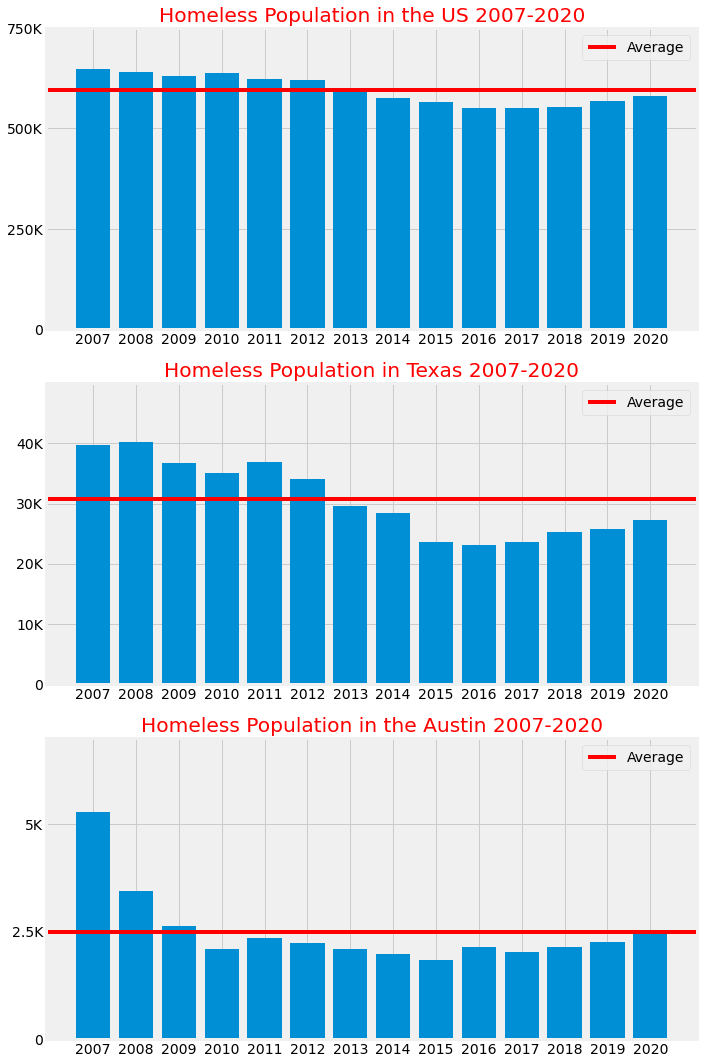

In [4]:

fig = plt.figure(figsize=(10,15))
plt.style.use('fivethirtyeight')
# bar graph fo US annual homelessness count
t_count = total_pit['Overall Homeless, ']
t_year = total_pit['year']
t_average = total_pit['Overall Homeless, '].mean()
plt.subplot(3,1,1)
plt.bar(t_year, t_count)
plt.axhline(t_average, color = 'red', label='Average')
plt.yticks([0, 250_000, 500_000, 750_000], labels=['0','250K', '500K', '750K'])
plt.ylim([0, 750_000])
plt.legend()
plt.title('Homeless Population in the US 2007-2020', color='red')

# bar graph for Texas annual homelessness count
tx_count = tx_pit['Overall Homeless, ']
tx_year = tx_pit['year']
tx_average = tx_pit['Overall Homeless, '].mean()
plt.subplot(3,1,2)
plt.bar(tx_year, tx_count)
plt.axhline(tx_average, color = 'red', label='Average')
plt.yticks([0, 10_000, 20_000, 30_000, 40_000], labels=['0','10K', '20K', '30K', '40K' ])
plt.ylim([0, 50_000])
plt.legend()
plt.title('Homeless Population in Texas 2007-2020', color='red')

# bar graph for Austin annual homelessness count
a_count = coc['Overall Homeless, ']
a_year = coc['year']
a_average = coc['Overall Homeless, '].mean()
plt.subplot(3,1,3)
plt.bar(a_year, a_count)
plt.axhline(a_average, color = 'red', label='Average')
plt.yticks([0, 2500, 5000], labels=['0','2.5K', '5K'])
plt.ylim([0, 7000])
plt.legend()
plt.title('Homeless Population in the Austin 2007-2020', color='red')
plt.tight_layout()
#plt.show()


### Is homelessness static or dynamic?
Looking at these charts we get a sense of the scale of homelessness. These numbers arent the total number of people that have experienced homelessness that year, but rather the number of people estimated to be homeless on one given day of that year. Due to the logistical challenges of compiling an accurate headcount of homeless people it is a miracle that these care facilities are able to pull this off at all, however I dont think that these numbers are a very accurate way for us to measure and think about the homeless population. Looking at these numbers we would tend to think of the homeless as a fairly static population. It seems like the levels rise and fall, but for the most part it is the same group of people.

However these point in time (PIT) counts are just one way to gauge homelessness. Since 2015 the facilities across the US that provide care to the homeless have been a part of a national program to collect and compile data with the aim of gaining insight to the performace of those facilities. The Homeless Management Information System (HMIS) puts out an annual report with data to measure 6 key metrics.
- length of time in the system
- the amount of people that return to the system after a successful exit
- the number of people served by the system 
- jobs and income growth for people in the system
- people entering the system for the first time
- the amount of people the exit the system "successfully"

Using these metrics we can put together a model that allows us to understand the annual flow happening in these facilities. The diagram below is a way to think of an individual's possible homelessness pathway options. There are two main categories of homelessness for our purposes, CoC and unsheltered. The homeless (Continuum of Care) facilities are set up to assist people with different needs across the continuum of homelessness, from emergency shelter to subsidized permanant housing. This is the channel that we can effectively monitor. The unsheltered population is included in the PIT annual counts, and through street outreach programs, but at the that channel is much less well tracked. 

My goal with this project is to build a model that shows the flow of the homeless population in and out of the CoC system to help governments and CoC facilities better measure the performance of the existing system.  

![homelessness_diagram.jpg](homelessness_diagram.jpg)

Importing the System performance measures data 

In [5]:
# importing the excel sheet for performance measures dat for 2020 and converting the columns into useable form for my purpose

# for now I have only done one year because their are multiple formats for the different years which will 
#         need attention to unify.

df = pd.read_excel('System-Performance-Measures-Data-Since-FY-2015.xlsx', sheet_name='2020', header=[1])

cols = ['State', 'Continuum of Care (CoC)',
        'Total Persons Returns in 24 mths (should include both the 6- and 12-month cohort).5','Total HMIS Count',
        'ES-SH-TH-PH 1st Time Homeless','Total Persons Exiting ES, TH, SH, PH-RRH',
        'Total Persons Exiting ES, TH, SH, PH-RRH to Permanent Housing',
       ]
new_cols = ['state', 'coc', 'return_from_PH', 'total_count', 'new_homeless', 'total_exiting', 'total_exiting_to_PH' ]

selected_df = df[cols].copy()
column_map_dict = dict(zip(cols, new_cols))
coc = selected_df.rename(columns=column_map_dict)

coc['existing'] = coc['total_count'] - coc['new_homeless'] - coc['return_from_PH']
coc['exit_to_unknown'] = coc['total_exiting'] - coc['total_exiting_to_PH']
coc['remain'] = coc['total_count'] - coc['total_exiting']
coc['%_successful_exit'] = coc['total_exiting'] / coc['total_exiting_to_PH']

col_order = ['state', 'coc','new_homeless','existing', 'return_from_PH',
             'total_count', 'exit_to_unknown', 'total_exiting_to_PH', 'remain', 'total_exiting', '%_successful_exit']
coc = coc[col_order].copy()
coc.head(1)

,state,coc,new_homeless,existing,return_from_PH,total_count,exit_to_unknown,total_exiting_to_PH,remain,total_exiting,%_successful_exit
0,AK,Anchorage CoC,3321,2095.0,209.0,5625.0,4202.0,496.0,927.0,4698.0,9.471774


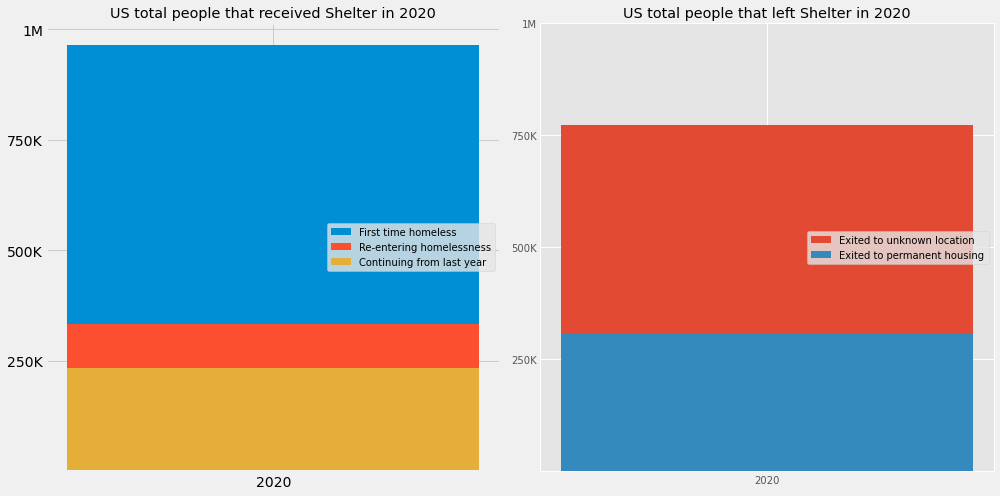

In [6]:
# plot for total inflow and outflow for the US

plt.style.use('fivethirtyeight')

new = coc['new_homeless'].sum()
returning = coc['return_from_PH'].sum()
existing = coc['existing'].sum()

plt.figure(figsize=(14,7))

plt.subplot(1, 2, 1)
plt.style.use('ggplot')
plt.bar('2020', height=existing+returning+new, label='First time homeless', width=.5)
plt.bar('2020', height=existing+returning, label= 'Re-entering homelessness', width=.5)
plt.bar('2020', height=existing, label='Continuing from last year', width=.5 )
plt.yticks([250_000, 500_000, 750_000, 1_000_000], labels=['250K', '500K', '750K', '1M'])
plt.title('US total people that received Shelter in 2020')
plt.legend(loc=5, frameon=True)

unknown = coc['exit_to_unknown'].sum()
successful_exit = coc['total_exiting_to_PH'].sum()
remain = coc['remain'].sum()

plt.subplot(1, 2, 2)
plt.style.use('ggplot')
plt.bar('2020', height = successful_exit + unknown, label = 'Exited to unknown location', width = .5)
plt.bar('2020', height = successful_exit, label = 'Exited to permanent housing', width = .5)
plt.yticks([250_000, 500_000, 750_000, 1_000_000], labels = ['250K', '500K', '750K', '1M'])
plt.title('US total people that left Shelter in 2020')
plt.legend(loc = 5, frameon = True)





plt.tight_layout()

plt.show()

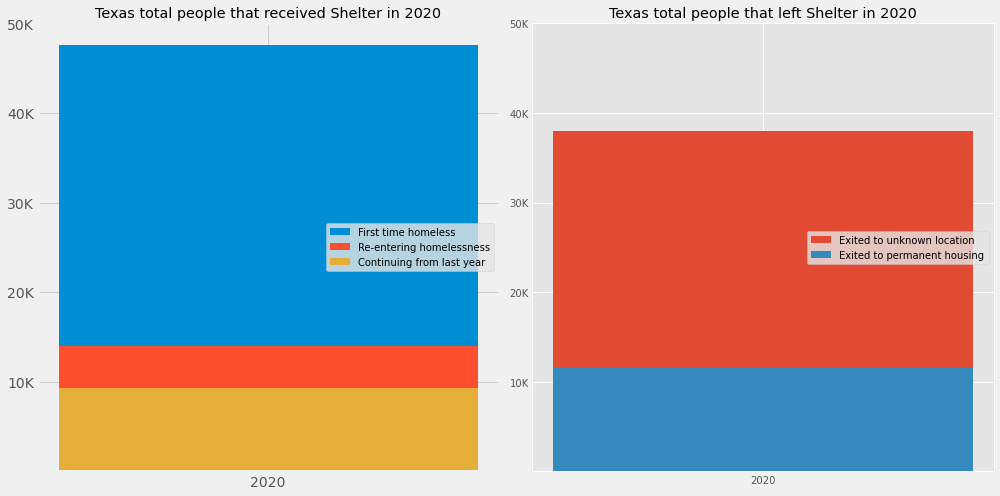

In [7]:
# selecting the CoC facilities inside Texas
tx_coc = coc[coc['state']=='TX'].copy()

# plotting the flow for Texas CoC facilities
plt.style.use('fivethirtyeight')

new = tx_coc['new_homeless'].sum()
returning = tx_coc['return_from_PH'].sum()
existing = tx_coc['existing'].sum()

plt.figure(figsize=(14,7))

plt.subplot(1, 2, 1)
plt.style.use('ggplot')
plt.bar('2020', height=existing+returning+new, label='First time homeless', width=.5)
plt.bar('2020', height=existing+returning, label= 'Re-entering homelessness', width=.5)
plt.bar('2020', height=existing, label='Continuing from last year', width=.5 )
plt.yticks([10_000, 20_000, 30_000, 40_000, 50_000], labels=['10K', '20K', '30K', '40K', '50K'])
plt.title('Texas total people that received Shelter in 2020')
plt.legend(loc=5, frameon=True)

unknown = tx_coc['exit_to_unknown'].sum()
successful_exit = tx_coc['total_exiting_to_PH'].sum()
remain = tx_coc['remain'].sum()

plt.subplot(1, 2, 2)
plt.style.use('ggplot')
plt.bar('2020', height = successful_exit + unknown, label = 'Exited to unknown location', width = .5)
plt.bar('2020', height = successful_exit, label = 'Exited to permanent housing', width = .5)
plt.yticks([10_000, 20_000, 30_000, 40_000, 50_000], labels=['10K', '20K', '30K', '40K', '50K'])
plt.title('Texas total people that left Shelter in 2020')
plt.legend(loc = 5, frameon = True)





plt.tight_layout()

plt.show()

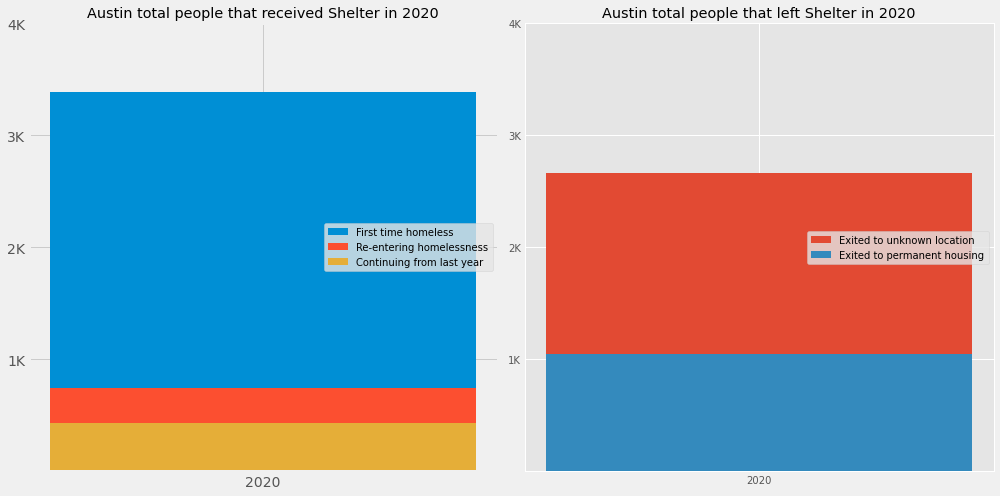

In [8]:
# selecting the CoC facilities inside Texas
aus_coc = coc[coc['coc']=='Austin/Travis County CoC'].copy()

# plotting the flow for Texas CoC facilities
plt.style.use('fivethirtyeight')

new = aus_coc['new_homeless'].sum()
returning = aus_coc['return_from_PH'].sum()
existing = aus_coc['existing'].sum()

plt.figure(figsize=(14,7))

plt.subplot(1, 2, 1)
plt.style.use('ggplot')
plt.bar('2020', height=existing+returning+new, label='First time homeless', width=.5)
plt.bar('2020', height=existing+returning, label= 'Re-entering homelessness', width=.5)
plt.bar('2020', height=existing, label='Continuing from last year', width=.5 )
plt.yticks([1_000, 2_000, 3_000, 4_000], labels=['1K', '2K', '3K', '4K'])
plt.title('Austin total people that received Shelter in 2020')
plt.legend(loc=5, frameon=True)

unknown = aus_coc['exit_to_unknown'].sum()
successful_exit = aus_coc['total_exiting_to_PH'].sum()
remain = aus_coc['remain'].sum()

plt.subplot(1, 2, 2)
plt.style.use('ggplot')
plt.bar('2020', height = successful_exit + unknown, label = 'Exited to unknown location', width = .5)
plt.bar('2020', height = successful_exit, label = 'Exited to permanent housing', width = .5)
plt.yticks([1_000, 2_000, 3_000, 4_000], labels=['1K', '2K', '3K', '4K'])
plt.title('Austin total people that left Shelter in 2020')
plt.legend(loc = 5, frameon = True)





plt.tight_layout()

plt.show()

## Sankey Diagram for visualizing the flow
while those bar charts do show that the homeless population is largely made up of "new" people, and that most of those that enter the system leave the same year, they dont express they in/out flow very well. Enter the Sankey diagram. Originally designed to show the flow of energy in a boiler system, the Sankey diagram does a much better job of telling the story of what happened this year with homelessness.

In [9]:
# importing CoC performance measures data from HUD website, turning the data in to a useable dataframe format with appropriate 
#      columns to be used for sankey diagram creation

import pandas as pd
import requests

def import_SPM_data():
    """import System Performance Measures Data excel spreadsheet from HUD website"""
    
    spmd_url = "https://files.hudexchange.info/resources/documents/System-Performance-Measures-Data-Since-FY-2015.xlsx"
    req = requests.get(spmd_url)
    url_content = req.content
    
    return url_content

def SPM_data_to_DataFrame(content):
    
    """convert downloaded SPM data into Pandas DataFrame
    notes: options to select data years, or adjust column selection for other applications
    """
    df = pd.read_excel(content, sheet_name='2020', header=[1])

    cols = ['State', 'Continuum of Care (CoC)',
            'Total Persons Returns in 24 mths (should include both the 6- and 12-month cohort).5','Total HMIS Count',
            'ES-SH-TH-PH 1st Time Homeless','Total Persons Exiting ES, TH, SH, PH-RRH',
            'Total Persons Exiting ES, TH, SH, PH-RRH to Permanent Housing',
           ]
    new_cols = ['state', 'coc', 'return_from_PH', 'total_count', 'new_homeless', 'total_exiting', 'total_exiting_to_PH' ]

    selected_df = df[cols].copy()
    column_map_dict = dict(zip(cols, new_cols))
    coc = selected_df.rename(columns=column_map_dict)

    coc['existing'] = coc['total_count'] - coc['new_homeless'] - coc['return_from_PH']
    coc['exit_to_unknown'] = coc['total_exiting'] - coc['total_exiting_to_PH']
    coc['remain'] = coc['total_count'] - coc['total_exiting']
    coc['%_successful_exit'] = coc['total_exiting'] / coc['total_exiting_to_PH']

    col_order = ['state', 'coc','new_homeless','existing', 'return_from_PH',
                 'total_count', 'exit_to_unknown', 'total_exiting_to_PH', 'remain', 'total_exiting', '%_successful_exit']
    coc = coc[col_order].copy()
    
    return coc

# import the data
data = import_SPM_data()
# store as formated dataframe
coc = SPM_data_to_DataFrame(data)



In [15]:
# Using the created dataframe data to produce an interactive Sankey diagram with dropdown widget to select CoC 


import plotly.graph_objects as go
import ipywidgets as widgets

# creating the tuple for the widget (state  CoC, CoC) - makes for easier readibility in dropdown menu
state_and_name = [name for name in coc['state'] + "    " + coc['coc']]
name = [name for name in coc['coc']]
coc_name_tuples=[(state_and_name[i], name[i]) for i in range(len(name))]

# Sankey diagram function with interactive widget
@widgets.interact(coc_name = coc_name_tuples)

def plot_sankey(coc_name = 'Austin/Travis County CoC'):
    
    target_coc = coc_name
    target_coc_data = coc[coc['coc']==target_coc].copy().reset_index(drop=True)
    
    data_labels = ['new_homeless', 'existing', 'return_from_PH', 'total_count' , 'total_exiting_to_PH',\
              'remain', 'exit_to_unknown']
    values = [target_coc_data.loc[0,label] for label in data_labels] 
    
    
    fig = go.Figure(data=[go.Sankey(
        arrangement='fixed',

        node = dict(
          pad = 25,
          thickness = 2,
          line = dict(color = "black", width = .5),
          label = ['new', 'existing', 'returning', 'total homeless','' , 'exit to permanant', 'remain', 'exit to unknown'],
        ),

        link = dict(
          source = [0, 1, 2, 3, 4, 4, 4],
          target = [3, 3, 3, 4, 5, 6, 7],
          value = values,  
          color = 'lightgrey',
      ))])

    fig.update_layout(title={'text': f"{target_coc} Homelessness flow 2020",
                            'y':0.9,
                            'x':0.5,
                            'xanchor': 'center',
                            'yanchor': 'top',
                            'font': dict(family="Old Standard TT", size=20)
                            })
    fig.update_layout(title_xref='paper')
    fig.update_layout(font_size=10)
    fig.update_layout(height=600, width=700)
    fig.show()
    


interactive(children=(Dropdown(description='coc_name', index=341, options=(('AK    Anchorage CoC', 'Anchorage …

## What is the problem?
By visualizing homelessness as a flow, rather than a static number, it is easy to identify the pathways that can have the highest impact to reduce homelessness. Currently, the homeless CoC facilities do an outstanding job of meeting the emergency needs of people who suddenly find themselves without shelter. It is beyond the scope of this project, but from what I have found, the supply of available CoC beds largely meets the demand. The CoC facilities also do a pretty good job of getting people back on their feet again as well. In 2020 more than half of the people in the Austin CoC system either exited to a permanant housing situation or remained in the system, both considered successful outcomes. 

The real opportunity here is with the people entering the system. Almost 80% of the people that received CoC assistance had never done so before! Once those people have entered the system they begin requiring expensive care and their likelihood of longterm recovery drastically diminishes. 

In [11]:
# Austin City population from:
# https://www.austintexas.gov/sites/default/files/files/Planning/Demographics/population_history_pub_2019.pdf

year = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
count = [735088, 750525, 774037, 790390, 812025, 832326, 855215, 878733, 900701, 926426, 949587, 967629, 985504, 995484]

austin_pop = pd.DataFrame({'year': year, 'population': count})
